In [1]:
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
from Classifiers import TransparentRidge
from Classifiers import TransparentLasso
from scipy.sparse import diags
import matplotlib.pyplot as plt
import PredictiveModels as pm
import pandas as pd
from LatestPreprocessing import *

# User Transparency

In [2]:
pd.set_option('display.width', 100)
user_stats = pd.read_csv('ml-latest/user_stats.csv', sep = ',',nrows=20)
print user_stats.head(10)

   User ID  Number of Ratings  Average Rating  Variance  Genre Ratio  Key Ratio  Fitness
0   242763               1929           2.875     4.092            0      0.040    0.369
1    28451               1274           2.813     3.909            0      0.086    0.305
2    87971               1181           3.383     3.426            0      0.065    0.278
3   155440               1028           2.631     3.292            0      0.085    0.245
4    60484               1224           2.054     3.114            0      0.077    0.234
5   120899               2031           2.662     2.356            0      0.022    0.214
6    46262                747           2.509     3.603            0      0.159    0.202
7   225941               1646           1.797     2.348            0      0.037    0.198
8   170099               2067           3.215     2.179            0      0.021    0.197
9   234450               1798           2.885     2.215            0      0.034    0.187


## Loading user matrix

In [3]:
userid = 242763
user_ratings = get_matched_user_ratings(userid)
movies = user_ratings.keys()
ratings = user_ratings.values()
print "User average rating: ", np.average(ratings)
print "Number of movies rated by this user: ", len(ratings)

User average rating:  2.86393692777
Number of movies rated by this user:  1966


In [4]:
print "Loading average and number of rating"
id_dict = get_id_row_dict()
idxs = [id_dict[k] for k in movies]
avg_and_num = sort_avg()

Loading average and number of rating


## Highest rated movies

In [6]:
movie_set = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
avg_df = df(np.column_stack((movie_set.title,avg_and_num)), columns = ("Movie", "Average Rating", "Number of Ratings"))
print avg_df.loc[avg_df["Number of Ratings"] > 100].sort(["Average Rating", "Number of Ratings"], ascending=[0,0]).head(20)

                                                   Movie Average Rating Number of Ratings
10075                    THE SHAWSHANK REDEMPTION (1994)       4.442559             77367
6085                                THE GODFATHER (1972)       4.354139             49554
3561                           THE USUAL SUSPECTS (1995)       4.319778             52957
18479                            SCHINDLER'S LIST (1993)       4.292279             59539
20916                      THE GODFATHER: PART II (1974)       4.269065             32048
18913                        SHICHININ NO SAMURAI (1954)       4.263744             12696
6943                                  REAR WINDOW (1954)       4.248423             19338
10182             ONE FLEW OVER THE CUCKOO'S NEST (1975)       4.243332             35657
15480                                  FIGHT CLUB (1999)       4.234274             48471
8583                                   CASABLANCA (1942)       4.233015             27715
12624  DR.

In [5]:
all_names = get_movie_names()
names = all_names[idxs]
rating_df = df(np.column_stack((names,ratings)), columns = ("Movie", "Rating"))
print rating_df.sort(["Rating"], ascending=0).head(20)

                                         Movie Rating
0                             TOY STORY (1995)      5
983                     THE FISHER KING (1991)      5
1964                     EDUCATING RITA (1983)      5
1963                               RUSH (1991)      5
1962                      LA DOLCE VITA (1960)      5
437                     THE DEER HUNTER (1978)      5
869             THE BLAIR WITCH PROJECT (1999)      5
7     AT PLAY IN THE FIELDS OF THE LORD (1991)      5
1954                             HARPER (1966)      5
1950        SUPPORT YOUR LOCAL SHERIFF! (1969)      5
10                       THE WILD GEESE (1978)      5
874                              LOLITA (1962)      5
1949   PERFUME: THE STORY OF A MURDERER (2006)      5
1948             HOW TO STEAL A MILLION (1966)      5
876                         THE MISSION (1986)      5
877                        FROM THE HIP (1987)      5
878      THE NIGHT OF THE FOLLOWING DAY (1968)      5
1944                   THE P

## User rating distribution

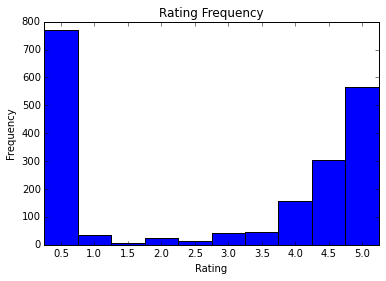

In [8]:
x = ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Genre Distribution

In [6]:
print "Loading genre matrix"
genre_matrix = get_genre_matrix()[idxs]
genre_dict = get_genre_dict()
inv_map = {v: k for k, v in genre_dict.items()}
names = [inv_map[k] for k in range(len(genre_dict))]

Loading genre matrix


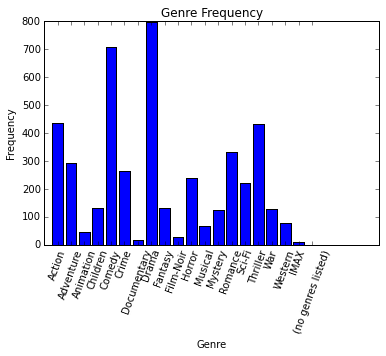

In [10]:
x = np.sum(genre_matrix, axis=0)
his = np.histogram(x, bins = range(0,21))
fig, ax = plt.subplots()
offset = 0
plt.bar(his[1][1:],x,align='center')
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels((list(names)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.title("Genre Frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [7]:
print "Loading key matrix"
keywords = pd.read_csv("ml-latest/matched_movies", delimiter='\t', usecols = [0,3], names = ['id', 'key'] )
x = get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
names = np.array([inv_map[k] for k in range(len(x))])
user_key_matrix = get_keyword_matrix()[idxs]

Loading key matrix
Number of popular keys:

 2336


## User Keyword Frequency

In [12]:
frequency = np.sum(user_key_matrix, axis=0, dtype = int)
indices = np.argsort(frequency)
keyword_df = df((np.column_stack((names[indices], frequency[indices]))), columns = ("Keyword", "Frequency"))
print keyword_df.sort(["Frequency"], ascending = 0).head(20)

                Keyword Frequency
2070     person-on-fire        99
2071            tragedy        99
2073          urination        99
2072     premarital-sex        99
2065            general        98
2066              1960s        98
2067          obsession        98
2068       double-cross        98
2069              theft        98
2064     unfaithfulness        98
2061         first-part        97
2063             hitman        97
2062     child-in-peril        97
2060        convertible        97
2059         flashlight        97
2058              judge        97
2057  product-placement        97
2056         california        97
2055          scientist        97
2053      strangulation        96


## User Actor Frequency

In [8]:
print "Loading actor matrix"
actor_matrix = get_actor_matrix()[idxs]
frequency = np.sum(actor_matrix, axis=0)
names = get_actor_names()
actor_df = df((np.column_stack((names, frequency))), columns = ("Actor", "Frequency"))
print actor_df.sort_index(by=["Frequency"], ascending = 0).head(20)

Loading actor matrix
                   Actor Frequency
921   Henry, William (I)       9.0
1867         Zane, Billy       9.0
922         Hensen, Lars       9.0
1864       Yulin, Harris       9.0
1861     Young, Carleton       9.0
1860     Young, Burt (I)       9.0
924     Herman, Paul (I)       9.0
931     Hicks, Chuck (I)       9.0
953       Homans, Robert       9.0
954      Hong, James (I)       9.0
371         Bellamy, Ned       9.0
1847      Wood, Fred (I)       9.0
961     Hordern, Michael       9.0
13    Bancroft, Anne (I)       9.0
574      Corey, Jeff (I)       9.0
365          Beatty, Ned       9.0
996        Isaacs, Jason       9.0
913          Hedaya, Dan       9.0
351        Barber, Bobby       9.0
1834   Wilson, Harry (I)       9.0

## Finding min alpha for user

In [9]:
pp.scale(avg_and_num[:,0], with_mean=True, with_std=True, copy=False)
pp.scale(avg_and_num[:,1], with_mean=True, with_std=True, copy=False)
data = np.column_stack((avg_and_num[idxs], genre_matrix, user_key_matrix, actor_matrix))
target = ratings
alphas = np.arange(.001,.02,.002)
min_lasso_mae = 2
avg_mae_list =list()
for alpha in alphas:
    mae_list = list()
    results = pm.get_lasso_cv_results(np.column_stack((data,target)), alpha, 10)
    mae = results[0]
    mae_list.append(results[0])
    if mae < min_lasso_mae:
        min_lasso_mae = mae
        min_lasso_alpha = alpha
        min_lasso_maes = mae_list
    avg_mae_list.append(mae)
print pd.DataFrame(np.column_stack((alphas,avg_mae_list)), columns = ['Alpha', 'MAE'])
print "Optimal alpha is: ", min_lasso_alpha

   Alpha       MAE
0  0.001  1.281532
1  0.003  1.125355
2  0.005  1.107146
3  0.007  1.124926
4  0.009  1.147761
5  0.011  1.169367
6  0.013  1.188266
7  0.015  1.206061
8  0.017  1.222741
9  0.019  1.239793
Optimal alpha is:  0.005


## Creating Lasso Model with Cross Validation and 10 Folds

In [24]:
results = pm.get_lasso_cv_results(np.column_stack((data,target)), min_lasso_alpha, 10)

y_pred = results[2]
ratings = user_ratings.values()
error_from_pred = np.abs(ratings-y_pred)

col_names = ["Movie ID" ,"User Rating","Model Prediction","Model Error"]

col_avg = ["Average:", np.average(ratings),np.average(y_pred),np.average(error_from_pred)]
user_result = np.column_stack((user_ratings.keys(), ratings, y_pred, error_from_pred))
user_result = user_result[np.argsort(user_result[:, 3])]
user_result = np.vstack((user_result,col_avg))

results_df = pd.DataFrame(user_result, columns = col_names)
print "Ten Lowest Errors"
print results_df.head(10)
print "\nTen Highest Errors"
print results_df.tail(10)

## Creating Lasso Model with Full Training Set

In [11]:
clf =TransparentLasso(min_lasso_alpha)
user_cols = data.shape[1]+1
clf.fit(data,target)
weights = clf.coef_
neg_evi, pos_evi = clf.predict_evidences(data)
bias = clf.get_bias()
y_pred = clf.predict(data)
indices = np.argsort(y_pred)
coef_diags = diags(clf.coef_, 0)
dm = data * coef_diags

## Weights and Features

In [12]:
get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
key_names = [inv_map[k] for k in range(len(x))]
genre_names = get_genre_dict().keys()
actor_names = get_actor_names()
features = np.hstack([['Average Rating', 'Number of Ratings'], genre_names, key_names, actor_names])

positive_weight_indices = weights > 0
negative_weight_indices = weights < 0

positive_features = np.column_stack((features[positive_weight_indices], weights[positive_weight_indices].astype(float)))
negative_features = np.column_stack((features[negative_weight_indices], weights[negative_weight_indices].astype(float)))

positive_df = pd.DataFrame(positive_features, columns = ["Features", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)
positive_df = positive_df.sort("Weights", ascending=0)

negative_df = pd.DataFrame(negative_features, columns = ["Features", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

negative_df = negative_df.sort("Weights", ascending=1)

print positive_df.head(10)
print negative_df.head(10)

               Features   Weights
0        Average Rating  1.665012
112       Connery, Sean  0.476878
122     Wayne, John (I)  0.459588
6              Children  0.410399
117       Irons, Jeremy  0.291075
111  Caine, Michael (I)  0.288810
18                 king  0.258632
33           television  0.236076
5           Documentary  0.227847
7                gadget  0.227641
        Features   Weights
95        dating -0.259358
2         Sci-Fi -0.256543
50      teenager -0.236953
24     brutality -0.232770
20   locker-room -0.225680
4      Animation -0.224079
71          bath -0.221185
46          bong -0.216387
80   eye-gouging -0.209634
109       insult -0.186505


## The Highest Predicted Rating

In [14]:
j = indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE MAN WHO WOULD BE KING (1975)
Actual User Rating:  5.0
Predicted User Rating:  6.311913442


### Movie Rating Distribution

Number of Ratings: 3754


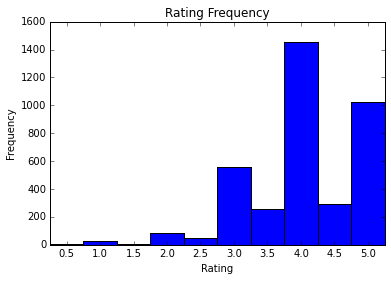

In [15]:
ratings = pd.read_csv("ml-latest/ratings.csv", delimiter=',', quotechar='"', names = ['userId', 'movieId', 'rating'])
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [35]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.70787060328
Bias and evidences: 2.63774259253 -0.0404916174235 2.11061962818
Positive Features
             Feature  Weights
0  Number of Ratings   0.8671
1             Horror   0.4401
2             Sci-Fi   0.4070
3     box-office-hit   0.2148
4            Fantasy   0.1816


Negative Features
    Feature  Weights
0  violence  -0.0405


## The Lowest Rating

In [37]:
j = indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  TURISTAS (2006)
Actual User Rating:  0.5
Predicted User Rating:  0.708781496659


### Movie Rating Distribution

In [38]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [39]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  0.708781496659
Bias and evidences: 2.63774259253 -1.92896109587 0.0
Positive Features
Empty DataFrame
Columns: [Feature, Weights]
Index: []
Negative Features
             Feature  Weights
0             Comedy  -0.8659
1              Drama  -0.3902
2      female-nudity  -0.2995
3          Animation  -0.2441
4             murder  -0.1188
5  Number of Ratings  -0.0104

## The case that has the most negative evidence, regardless of positive evidence

In [ ]:
j = np.argsort(neg_evi)[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

## The case that has the most positive evidence, regardless of negative evidence

In [ ]:
j = np.argsort(pos_evi)[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

### Movie Rating Distribution

In [ ]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [ ]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

# Most conflicted

In [16]:
conflict = np.min([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(conflict)
j=indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  KILL BILL: VOL. 1 (2003)
Actual User Rating:  4.0
Predicted User Rating:  3.56970975872


### Movie Rating Distribution

Number of Ratings: 26001


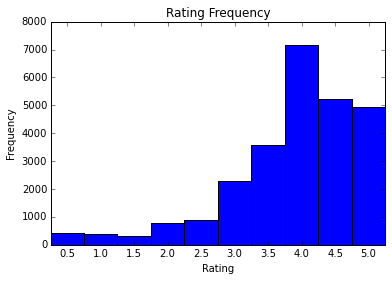

In [17]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [18]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  3.56970975872
Bias and evidences: 2.79599965266 -2.5639079087 3.33761801477
Positive Features
          Feature  Weights
0  Average Rating   1.8746
1             sex   0.1950
2        neo-noir   0.1759
3       Film-Noir   0.1469
4         villain   0.1355
5            baby   0.1320
6            love   0.1309
7  dream-sequence   0.1270
8       nightclub   0.0997
9     sword-fight   0.0589
Negative Features
                                       Feature  Weights
0                            Number of Ratings  -0.3957
1                                     teenager  -0.2370
2                                    brutality  -0.2328
3                                  eye-gouging  -0.2096
4                                 decapitation  -0.1747
5                           female-protagonist  -0.1412
6  character-repeating-someone-else's-dialogue  -0.1393
7                         opening-action-scene  -0.1388
8                               child-in-peril  -0.1382
9                 

# Least amount of info

In [19]:
information = np.max([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(information)
j=indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  TOKYO JOE (1949)
Actual User Rating:  5.0
Predicted User Rating:  2.98665898504


### Movie Rating Distribution

Number of Ratings: 20


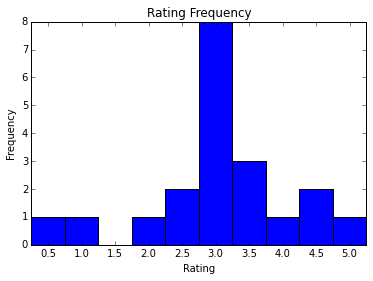

In [20]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [21]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  2.98665898504
Bias and evidences: 2.79599965266 0.0 0.190659332389
Positive Features
             Feature  Weights
0              Drama   0.1325
1     Average Rating   0.0240
2  Number of Ratings   0.0147
3    american-abroad   0.0125
4         kidnapping   0.0070
Negative Features
Empty DataFrame
Columns: [Feature, Weights]
Index: []


## Defining movie matrix for unrated films

In [ ]:
user_cols = user_matrix.shape[1]
data = user_matrix[:, 1:(user_cols-1)]
target = user_matrix[:, (user_cols-1)]
user_rated = user_matrix[:, 0]-1
movie_file = open("postprocessed-data/movie_matrix", "r")
movie_matrix = pickle.load(movie_file)[:, 1:]
movie_file.close()

## Predicting unrated films using Lasso and 5 fold cross validation

In [ ]:
clf =TransparentLasso(min_lasso_alpha)
clf.fit(data,target)
all_pred = clf.predict(movie_matrix)
unrated_pred = np.delete(all_pred, user_rated, 0)
indices = np.argsort(unrated_pred)[::-1]
unrated_movies = np.delete(movies, user_rated, 0)
sorted_movies = unrated_movies[indices]
movie_df = pd.DataFrame(np.column_stack((sorted_movies,unrated_pred[indices])), columns = ['Movie', 'Prediction'])
print "Top predicted movies"
print movie_df.head(10)
print "Lowest predicted movies"
print movie_df.tail(10)